In [16]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, optimizers, layers

In [17]:
import pandas as pd

In [18]:
data = pd.read_excel("Data_Base.xlsx")

In [19]:
data.columns

Index(['C_m_delta_e', 'U_0', 'rho', 'st', 'c', 'I_y', 'C_z_delta_e', 'm', 'kp',
       'ki', 'kd'],
      dtype='object')

In [20]:
X = data[['C_m_delta_e', 'U_0', 'rho', 'st', 'c', 'I_y', 'C_z_delta_e', 'm',]]
y = data['kp']

In [21]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
Xnor = trans.fit_transform(X)

In [74]:
network = Sequential()
network.add(layers.Dense(8, activation='relu', input_shape=(8,)))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(1))
#
# Configure the network with optimizer, loss function and accuracy
#
network.compile(optimizer=optimizers.Adam(lr=0.001),
                loss='mse',
                metrics=['mae'])

X_train, X_test, y_train, y_test = train_test_split(Xnor, y, test_size=0.2, random_state=42)

history = network.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=1000,
                    batch_size=40)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/1000
20/20 [==============================] - 1s 10ms/step - loss: 9.4185 - mae: 2.4723 - val_loss: 9.9539 - val_mae: 2.5294
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 8.7388 - mae: 2.3245 - val_loss: 9.1821 - val_mae: 2.3639
Epoch 3/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.9867 - mae: 2.1439 - val_loss: 8.3139 - val_mae: 2.1579
Epoch 4/1000
20/20 [==============================] - 0s 3ms/step - loss: 7.1263 - mae: 1.9214 - val_loss: 7.3496 - val_mae: 1.9288
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 6.2197 - mae: 1.7624 - val_loss: 6.3315 - val_mae: 1.8566
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 5.3376 - mae: 1.7422 - val_loss: 5.4428 - val_mae: 1.8544
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 4.6286 - mae: 1.7555 - val_loss: 4.8334 - val_mae: 1.8684
Epoch 8/1000
20/20 [==============================] - 0s 3ms/step - loss: 4

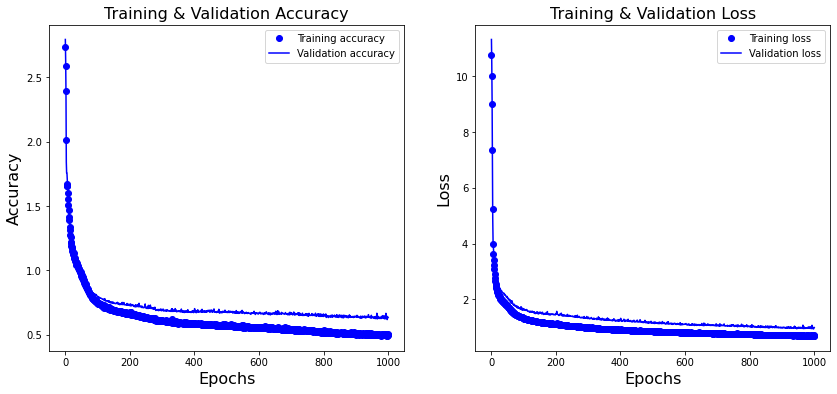

In [68]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [81]:
i = 4
print('Hagamos predicción!')

trans = MinMaxScaler()
#vec = np.array([-1.3265, 49.4088176352705, 1.29, 0.25250501002004, 0.355711422845691, 0.17, -3.565, 9242.48496993988]).reshape(1,8)
#vec_norm = trans.fit_transform(vec.reshape(1,8))


resultado = network.predict(X_test[i].reshape(1,8))
#resultado = network.predict(vec)
print(f'El resultado es: {str(resultado)}')
print(f'El valor real es: {y_test.values[i]}')

Hagamos predicción!
El resultado es: [[1.1094581]]
El valor real es: 1.05


In [45]:
network.evaluate(x=X_test, y=y_test)

10/10 [==============================] - 0s 2ms/step - loss: 1.8365 - mae: 1.0377


[1.8365190029144287, 1.0376834869384766]

In [47]:
loss, mae = network.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

10/10 - 0s - loss: 1.8365 - mae: 1.0377 - 29ms/epoch - 3ms/step
Testing set Mean Abs Error:  1.04 MPG


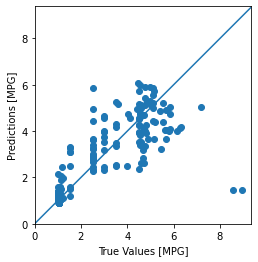

In [82]:
test_predictions = network.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

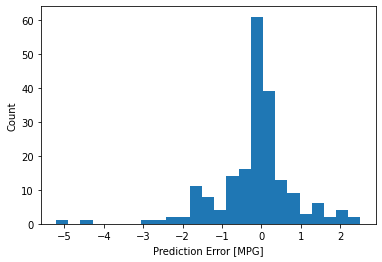

In [72]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")